# Telecom Churn Case Study
### A telecom company required to analyse customer-level data of Indian and Southeast Asian market and build predictive models to identify customers at high risk of churn and identify the main indicators of churn

There are various ways to define churn. In this study we will use usage-based churn which means customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time consider as churn


### Data Understanding and Preparation

In [1]:
# import necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [121]:

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/colab data/telecom_churn_data.csv"
telec = pd.read_csv(path)

In [ ]:
telec.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [ ]:
telec.shape

(99999, 226)

In [ ]:
telec.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [ ]:
# checking the statistical values
telec.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


#### Handling Missing Data

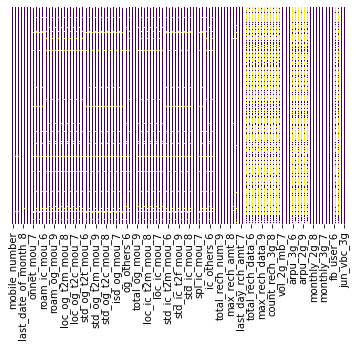

In [ ]:
# visualizing missing values
sns.heatmap(data=telec.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [4]:
missing_val = (round(((telec.isnull().sum()/len(telec.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_val

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [5]:
# dropping columns having more than 30 percent missing values as imputing those columns might lead to biased results

telec_1 = telec.drop(telec.loc[:,list(round(100*(telec.isnull().sum()/len(telec.index)), 2)>30)].columns, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


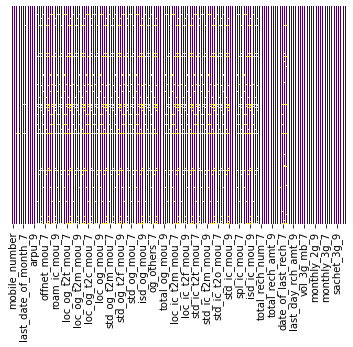

In [ ]:
sns.heatmap(data=telec_1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [6]:
telec_1.shape

(99999, 186)

#### After dropping columns having more than 30 percent missing values, we have 186 columns

#### Filter high-value customers
Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [8]:
# creating a average recharge column
telec_1['avg_rech_amt2months'] = (telec_1['total_rech_amt_6'] + telec_1['total_rech_amt_7'])/2

In [9]:
# measure the 70th percentile of avg_rech_amt2months column
X = telec_1['avg_rech_amt2months'].quantile(0.7)
X

368.5

In [10]:
# Finding avg_rech_amt2months greater than X
df = telec_1[telec_1['avg_rech_amt2months'] >= X]
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [11]:
# checking the shape of dataset having more than or equal to 70 perc recharge
df.shape

(30011, 187)

After filtering the high-value customers, we get about **30k** rows

#### Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [12]:
# defining churn variable
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


In [13]:
# storing attributes corresponding to churn
churn_9 = [col for col in df.columns.to_list() if '_9' in col]
print(churn_9)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [14]:
# drop attributes corresponding to churn
df1 = df.drop(churn_9,axis=1)

In [ ]:
df1.shape

(30011, 144)

In [ ]:
round(100*(df1['churn'].mean()),2)

8.64

#### Handling Missing Values


In [15]:
# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Checking the missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,null
loc_ic_mou_9,5.68
std_ic_t2o_mou_9,5.68
roam_og_mou_9,5.68
std_ic_mou_9,5.68
loc_og_t2t_mou_9,5.68
loc_og_t2m_mou_9,5.68
std_ic_t2t_mou_9,5.68
loc_og_t2f_mou_9,5.68
og_others_9,5.68
loc_og_t2c_mou_9,5.68


In [16]:
# Listing the columns of MOU Aug(8)
df_null_mou_8 = df1[(df1['loc_og_t2m_mou_8'].isnull()) & (df1['loc_ic_t2f_mou_8'].isnull()) & (df1['roam_og_mou_8'].isnull()) & (df1['std_ic_t2m_mou_8'].isnull()) &
  (df1['loc_og_t2t_mou_8'].isnull()) & (df1['std_ic_t2t_mou_8'].isnull()) & (df1['loc_og_t2f_mou_8'].isnull()) & (df1['loc_ic_mou_8'].isnull()) &
  (df1['loc_og_t2c_mou_8'].isnull()) & (df1['loc_og_mou_8'].isnull()) & (df1['std_og_t2t_mou_8'].isnull()) & (df1['roam_ic_mou_8'].isnull()) &
  (df1['loc_ic_t2m_mou_8'].isnull()) & (df1['std_og_t2m_mou_8'].isnull()) & (df1['loc_ic_t2t_mou_8'].isnull()) & (df1['std_og_t2f_mou_8'].isnull()) & 
  (df1['og_others_8'].isnull()) & (df1['std_og_mou_8'].isnull()) & (df1['spl_og_mou_8'].isnull()) & 
  (df1['std_ic_t2f_mou_8'].isnull()) & (df1['isd_og_mou_8'].isnull()) & (df1['std_ic_mou_8'].isnull()) & (df1['offnet_mou_8'].isnull()) & 
  (df1['isd_ic_mou_8'].isnull()) & (df1['ic_others_8'].isnull()) & (df1['onnet_mou_8'].isnull()) & 
  (df1['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months,churn
111,7001300706,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,596.301,146.073,0.00,55.19,3.26,NaN,45.51,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,55.19,3.26,NaN,43.83,12.34,NaN,0.00,0.00,NaN,0.00,0.0,NaN,99.03,15.61,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.30,0.0,NaN,0.0,0.0,NaN,1.30,0.00,NaN,0.0,0.0,NaN,0.38,2.71,NaN,1.29,0.0,NaN,102.01,18.33,0.0,50.01,16.66,NaN,160.68,58.53,NaN,5.06,0.40,NaN,215.76,75.59,NaN,0.00,0.00,NaN,0.00,0.0,NaN,1.13,0.0,NaN,0.0,0.0,NaN,1.13,0.00,NaN,217.04,75.59,0.0,0.0,0.0,NaN,0.00,0.0,NaN,0.15,0.0,NaN,12,8,5,704,178,0,154,50,0,6/13/2014,7/27/2014,8/24/2014,154,30,0,284.50,0.00,0.0,0.00,0.00,0.0,1,0,0,0,0,0,0,0,0,1,0,0,332,0.00,0.00,0.00,0.0,441.0,1
143,7000106299,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,695.609,39.981,0.00,1325.91,28.61,NaN,13.91,1.89,NaN,0.00,8.94,NaN,0.00,8.53,NaN,18.89,6.83,NaN,8.58,1.56,NaN,0.00,0.00,NaN,2.09,0.0,NaN,27.48,8.39,NaN,1307.01,13.58,NaN,1.95,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,1308.96,13.58,NaN,0.0,0.0,NaN,3.38,0.00,NaN,1.20,0.0,NaN,1341.03,21.98,0.0,30.19,7.06,NaN,27.98,1.35,NaN,10.13,0.00,NaN,68.31,8.41,NaN,25.56,0.00,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.0,0.0,NaN,25.56,0.00,NaN,93.88,8.41,0.0,0.0,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,31,6,4,796,40,0,90,30,0,6/30/2014,7/22/2014,8/28/2014,10,0,0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0,1
188,7000340381,109,0.0,0.0,0.0,6/30/2014,7/31/2014,NaN,734.641,183.668,0.00,4.38,0.98,NaN,105.16,39.39,NaN,0.00,0.00,NaN,0.00,0.00,NaN,4.38,0.98,NaN,99.81,38.98,NaN,5.34,0.41,NaN,0.00,0.0,NaN,109.54,40.38,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.00,0.0,NaN,109.54,40.38,0.0,21.18,13.44,NaN,217.03,56.63,NaN,18.28,2.94,NaN,256.49,73.03,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.0,0.0,NaN,0.00,0.00,NaN,256.49,73.03,0.0,0.0,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,6,1,0,864,120,0,252,120,0,6

In [17]:
# Delete the records for which MOU for Aug(8) are null
df2 = df1.drop(df_null_mou_8.index)

In [18]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df2[(df2['loc_og_t2m_mou_6'].isnull()) & (df2['loc_ic_t2f_mou_6'].isnull()) & (df2['roam_og_mou_6'].isnull()) & (df2['std_ic_t2m_mou_6'].isnull()) &
  (df2['loc_og_t2t_mou_6'].isnull()) & (df2['std_ic_t2t_mou_6'].isnull()) & (df2['loc_og_t2f_mou_6'].isnull()) & (df2['loc_ic_mou_6'].isnull()) &
  (df2['loc_og_t2c_mou_6'].isnull()) & (df2['loc_og_mou_6'].isnull()) & (df2['std_og_t2t_mou_6'].isnull()) & (df2['roam_ic_mou_6'].isnull()) &
  (df2['loc_ic_t2m_mou_6'].isnull()) & (df2['std_og_t2m_mou_6'].isnull()) & (df2['loc_ic_t2t_mou_6'].isnull()) & (df2['std_og_t2f_mou_6'].isnull()) & 
  (df2['og_others_6'].isnull()) & (df2['std_og_mou_6'].isnull()) & (df2['spl_og_mou_6'].isnull()) & 
  (df2['std_ic_t2f_mou_6'].isnull()) & (df2['isd_og_mou_6'].isnull()) & (df2['std_ic_mou_6'].isnull()) & (df2['offnet_mou_6'].isnull()) & 
  (df2['isd_ic_mou_6'].isnull()) & (df2['ic_others_6'].isnull()) & (df2['onnet_mou_6'].isnull()) & 
  (df2['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months,churn
77,7001328263,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,30.000,82.378,674.950,NaN,34.23,149.69,NaN,39.44,179.18,NaN,0.0,0.00,NaN,0.0,0.00,NaN,34.23,149.69,NaN,32.18,101.63,NaN,0.91,29.86,NaN,0.0,3.9,NaN,67.33,281.19,NaN,0.00,0.00,NaN,0.00,0.00,NaN,6.35,40.09,NaN,0.0,0.0,NaN,6.35,40.09,NaN,2.93,28.04,NaN,0.00,7.58,NaN,0.0,0.0,0.0,76.61,356.93,NaN,79.46,191.24,NaN,43.31,94.18,NaN,2.03,0.00,NaN,124.81,285.43,NaN,8.00,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.0,0.0,NaN,8.00,0.00,0.0,135.38,289.33,NaN,0.0,0.0,NaN,2.56,0.50,NaN,0.0,3.39,4,5,3,0,1154,750,0,1000,750,6/17/2014,7/27/2014,8/27/2014,0,0,750,0.0,96.48,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0,0
364,7002168045,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,792.112,989.368,NaN,433.49,198.96,NaN,845.11,923.58,NaN,0.0,0.00,NaN,0.0,0.00,NaN,28.78,7.46,NaN,78.78,584.76,NaN,21.58,9.43,NaN,0.0,0.0,NaN,129.14,601.66,NaN,404.71,191.49,NaN,722.01,321.41,NaN,0.00,0.00,NaN,0.0,0.0,NaN,1126.73,512.91,NaN,0.00,0.00,NaN,45.14,13.84,NaN,0.0,0.0,0.0,1301.03,1128.43,NaN,7.41,10.23,NaN,69.39,93.48,NaN,0.00,0.83,NaN,76.81,104.54,NaN,5.81,10.09,NaN,37.94,86.63,NaN,0.0,0.00,NaN,0.0,0.0,NaN,43.76,96.73,0.0,185.14,219.59,NaN,0.0,0.0,NaN,64.56,18.31,NaN,0.0,0.00,4,12,24,0,970,1104,0,154,154,6/24/2014,7/31/2014,8/27/2014,0,50,50,0.0,565.78,2108.66,0.00,0.00,0.00,0,1,1,0,0,2,0,0,0,0,0,1,424,0.00,0.00,0.00,0.00,485.0,0
423,7000635248,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,213.802,304.194,149.710,NaN,0.00,0.00,NaN,10.03,1.45,NaN,0.0,0.00,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.00,0.58,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.00,0.58,NaN,0.00,0.00,NaN,0.00,0.25,NaN,0.00,0.61,NaN,0.0,0.0,NaN,0.00,0.86,NaN,10.03,0.00,NaN,0.00,0.00,NaN,0.0,0.0,0.0,10.03,1.45,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.36,NaN,0.0,0.0,NaN,0.00,0.36,0.0,8.31,0.36,NaN,0.0,0.0,Na

In [19]:
# Delete the records for which MOU for _6 are null
df3 = df2.drop(df_null_mou_6.index)

In [20]:
# Create a dataframe with the condition, in which MOU for _7 are null
df_null_mou_7 = df3[(df3['loc_og_t2m_mou_7'].isnull()) & (df3['loc_ic_t2f_mou_7'].isnull()) & (df3['roam_og_mou_7'].isnull()) & (df3['std_ic_t2m_mou_7'].isnull()) &
  (df3['loc_og_t2t_mou_7'].isnull()) & (df3['std_ic_t2t_mou_7'].isnull()) & (df3['loc_og_t2f_mou_7'].isnull()) & (df3['loc_ic_mou_7'].isnull()) &
  (df3['loc_og_t2c_mou_7'].isnull()) & (df3['loc_og_mou_7'].isnull()) & (df3['std_og_t2t_mou_7'].isnull()) & (df3['roam_ic_mou_7'].isnull()) &
  (df3['loc_ic_t2m_mou_7'].isnull()) & (df3['std_og_t2m_mou_7'].isnull()) & (df3['loc_ic_t2t_mou_7'].isnull()) & (df3['std_og_t2f_mou_7'].isnull()) & 
  (df3['og_others_7'].isnull()) & (df3['std_og_mou_7'].isnull()) & (df3['spl_og_mou_7'].isnull()) & 
  (df3['std_ic_t2f_mou_7'].isnull()) & (df3['isd_og_mou_7'].isnull()) & (df3['std_ic_mou_7'].isnull()) & (df3['offnet_mou_7'].isnull()) & 
  (df3['isd_ic_mou_7'].isnull()) & (df3['ic_others_7'].isnull()) & (df3['onnet_mou_7'].isnull()) & 
  (df3['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months,churn
3734,7000798323,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1169.330,0.000,1.930,0.00,NaN,0.00,0.00,NaN,1.28,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.28,0.0,NaN,0.00,0.00,NaN,1.28,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.0,0.00,0.0,1.28,0.00,NaN,0.00,0.88,NaN,0.00,0.00,NaN,0.00,0.88,NaN,0.00,0.0,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.0,0.00,NaN,0.00,0.88,0.0,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,9,4,2,1404,0,0,400,0,0,6/22/2014,7/17/2014,8/1/2014,400,0,0,0.00,0.0,0.00,0.0,0.0,0.00,0,0,0,0,0,0,2,0,0,0,0,0,955,0.00,0.0,0.0,0.00,702.0,1
5616,7001238202,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,760.815,531.088,992.818,324.91,NaN,386.13,350.29,NaN,399.64,463.63,NaN,221.46,505.71,NaN,175.93,145.91,NaN,243.43,0.85,NaN,184.78,1.13,NaN,7.94,0.0,NaN,12.51,147.89,NaN,436.16,0.96,NaN,17.06,15.91,NaN,144.04,0.00,NaN,0.0,0.0,NaN,0.0,16.88,NaN,161.11,0.00,NaN,0.00,4.71,NaN,12.56,0.0,NaN,0.0,169.49,0.0,609.84,78.76,NaN,233.66,1.36,NaN,11.53,6.61,NaN,0.00,86.74,NaN,245.19,0.0,NaN,12.13,21.76,NaN,110.99,0.0,NaN,0.00,0.0,NaN,0.0,21.76,NaN,123.13,189.81,0.0,397.13,0.00,NaN,0.00,81.29,NaN,28.79,0.00,NaN,0.00,5,7,9,776,780,904,250,330,200,6/17/2014,7/30/2014,8/27/2014,250,0,130,0.00,0.0,11.26,0.0,0.0,79.94,0,0,1,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0,0
9451,7001477649,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1129.566,0.000,128.252,11.89,NaN,1.46,259.18,NaN,26.21,9.98,NaN,1.73,5.66,NaN,2.46,6.73,NaN,1.46,171.46,NaN,20.54,0.00,NaN,0.00,0.0,NaN,0.00,178.19,NaN,22.01,5.16,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.0,5.16,NaN,0.00,74.91,NaN,4.74,7.13,NaN,0.00,0.0,NaN,0.0,265.41,0.0,26.76,17.24,NaN,0.60,130.09,NaN,16.54,25.46,NaN,8.76,172.81,NaN,25.91,1.5,NaN,0.00,0.41,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.0,1.91,NaN,0.00,217.33,0.0,43.44,0.00,NaN,0.00,42.59,NaN

In [21]:
# Delete the records for which MOU for _7 are null
df4 = df3.drop(df_null_mou_7.index)

In [22]:
# check the percentage of missing values in columns
df4_missing_col = (round(((df4.isnull().sum()/len(df4.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df4_missing_col

,null
date_of_last_rech_8,1.08
date_of_last_rech_7,0.21
date_of_last_rech_6,0.11
mobile_number,0.00
isd_ic_mou_6,0.00
total_ic_mou_7,0.00
total_ic_mou_8,0.00
spl_ic_mou_6,0.00
spl_ic_mou_7,0.00
spl_ic_mou_8,0.00


During the data exploration it clearifies that we do not need date columns for further analysis. Hence deleting the date columns


In [24]:
# delete the date columns
df4.drop(['date_of_last_rech_8','date_of_last_rech_6','date_of_last_rech_7','last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'],axis=1,inplace=True)

In [25]:
df4_missing_col = (round(((df4.isnull().sum()/len(df4.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df4_missing_col

,null
mobile_number,0.0
spl_ic_mou_8,0.0
std_ic_mou_8,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
total_ic_mou_8,0.0
spl_ic_mou_6,0.0
spl_ic_mou_7,0.0
isd_ic_mou_6,0.0
total_rech_num_8,0.0


As we can see there is no more missing values in columns. We opted to delete columns and rows having missing values because recharge is dependent on multiple factors and imputing them with any statistical values might give biased results thus dropping them would be a good choice as we have enough rows in dataset

In [ ]:
df4.shape

(28861, 141)

### Feature Engineering

In [26]:
# listing the total_mou columns
[total_mou for total_mou in df4.columns.to_list() if 'total' in total_mou]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [27]:
# In order to identify the churn behaviour of customers, we need to compare the behavioural change through good phase to action phase. 
## Hence, creating the features to calculate the difference in usage

# Total mou at good phase incoming and outgoing
df4['total_mou@good'] = (df4['total_og_mou_6'] + df4['total_ic_mou_6'])

In [28]:
# Average mou at action phase
df4['avg_mou@action'] = (df4['total_og_mou_7'] + df4['total_og_mou_8'] + df4['total_ic_mou_7'] + df4['total_ic_mou_8'])/2

In [29]:
# Calculate the difference of average mou in good and action phase
df4['diff_mou'] = df4['avg_mou@action'] - df4['total_mou@good']

In [ ]:
df4.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months,churn,total_mou@good,avg_mou@action,diff_mou
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310
16,7000875565,430.975,299

In [30]:
# Checking if mou is negative in action phase
df4['changed_mou_action'] = np.where((df4['diff_mou'] < 0), 1, 0)

In [ ]:
df4.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months,churn,total_mou@good,avg_mou@action,diff_mou,changed_mou_action
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1


##### Through the dataset we can identify that there are customers whose behaviour has changed negatively through good phase to action phase. As earlier(good phase) they were involved in more usage of telecom services than later(action phase) 

In [31]:
# Average recharge number at action phase
df4['avg_rech_num_action'] = (df4['total_rech_num_7'] + df4['total_rech_num_8'])/2

In [32]:
# calculating the difference between total_rech_num_6 and avg_rech_action
df4['diff@rech_num'] = df4['avg_rech_num_action'] - df4['total_rech_num_6']

In [33]:
# Identifying based on difference in rech_num in action phase
df4['decrease_rech_num_action'] = np.where((df4['diff@rech_num'] < 0), 1, 0)

In [ ]:
df4.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months,churn,total_mou@good,avg_mou@action,diff_mou,changed_mou_action,avg_rech_num_action,diff@rech_num,decrease_rech_num_action
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1,6.0,1.0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0

In [34]:
# calculating average revenue at user's end in action phase
df4['avg_arpu@action'] = (df4['arpu_7'] + df4['arpu_8'])/2

In [35]:
# Difference in arpu between good and action phase
df4['diff_arpu'] = df4['avg_arpu@action'] - df4['arpu_6']

In [36]:
# Identifying based on difference in arpu in action phase
df4['changed_arpu_action'] = np.where(df4['diff_arpu'] < 0, 1, 0)

In [ ]:
df4.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months,churn,total_mou@good,avg_mou@action,diff_mou,changed_mou_action,avg_rech_num_action,diff@rech_num,decrease_rech_num_action,avg_arpu@action,diff_arpu,changed_arpu_action
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1,6.0,1.0,0,2260.6650,1191.4850,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,314.7925,-63.9285,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,

In [37]:
# calculating the volume based cost at action phase
df4['avg_vbc_3g@action'] = (df4['jul_vbc_3g'] + df4['aug_vbc_3g'])/2

In [38]:
# Calculate the difference in vbc between good and action phase
df4['diff_vbc'] = df4['avg_vbc_3g@action'] - df4['jun_vbc_3g']

In [39]:
#  Identifying change based on difference in vbc in action phase
df4['changed_vbc_action'] = np.where(df4['diff_vbc'] < 0 , 1, 0)

In [ ]:
df4.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months,churn,total_mou@good,avg_mou@action,diff_mou,changed_mou_action,avg_rech_num_action,diff@rech_num,decrease_rech_num_action,avg_arpu@action,diff_arpu,changed_arpu_action,avg_vbc_3g@action,diff_vbc,changed_vbc_action
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1,6.0,1.0,0,2260.6650,1191.4850,0,38.560,19.820,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,

In [40]:
# define average rech_amt in action phase
df4['avg_rech_amt@action'] = (df4['total_rech_amt_7'] + df4['total_rech_amt_8'])/2

In [41]:
# Measure the difference between action phase rech amt and good phase rech amt
df4['diff_rech_amt'] = df4['avg_rech_amt@action'] - df4['total_rech_amt_6']

In [42]:
# Checking if rech_amt has decreased in action phase
df4['decrease_rech_amt@action'] = np.where((df4['diff_rech_amt'] < 0), 1, 0) 

In [ ]:
df4.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt2months,churn,total_mou@good,avg_mou@action,diff_mou,changed_mou_action,avg_rech_num_action,diff@rech_num,decrease_rech_num_action,avg_arpu@action,diff_arpu,changed_arpu_action,avg_vbc_3g@action,diff_vbc,changed_vbc_action,avg_rech_amt@action,diff_rech_amt,decrease_rech_amt@action
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1,6.0,1.0,0,2260.6650,1191.4850,0,38.560,19.820,0,2214.0,634.0,0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,314.7925,-63.9285,1,465.840,343.680,0,360.5,-76.5,1
13,7002191713,1

## Exploratory Data Analysis

### Univariate Analysis

In [43]:
# Checking the unique value counts in columns
unique_1_col=[]
for i in df1.columns:
    if df1[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

df1.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)They have no variance in the model\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)They have no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [ ]:
df1.shape

(30011, 131)

In [44]:
# creating binary columns
binary_col=[col for col in df4.columns if len(df4[col].unique())==2]
binary_col

['churn',
 'changed_mou_action',
 'decrease_rech_num_action',
 'changed_arpu_action',
 'changed_vbc_action',
 'decrease_rech_amt@action']

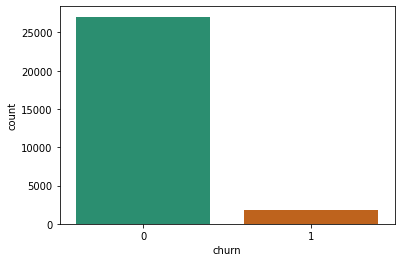

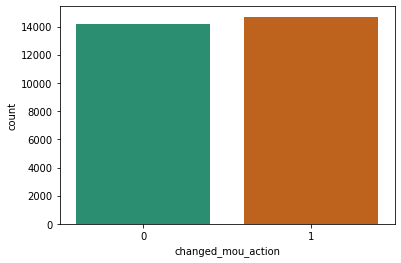

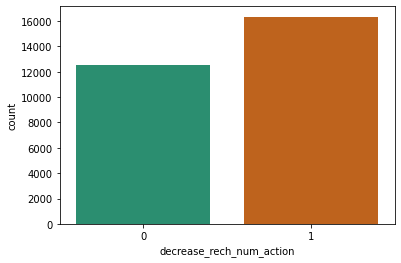

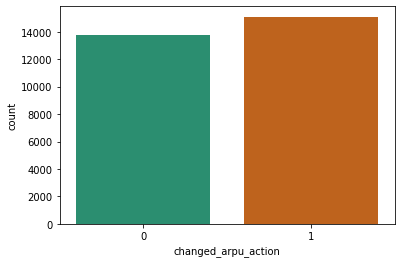

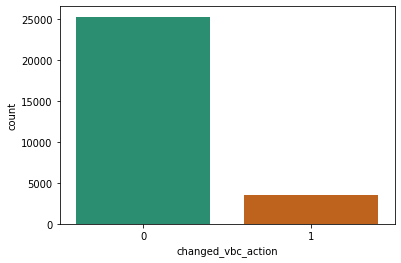

In [ ]:
# lets visualize binary column
for col in binary_col:
  sns.countplot(x=col,data=df4,palette='Dark2')
  plt.show()

Through the countplot of binary columns we identified the churn data distribution in df4

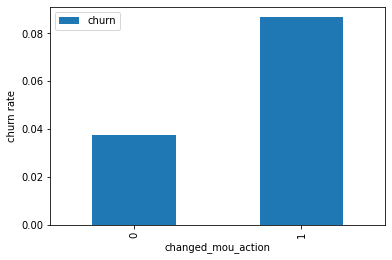

In [ ]:
# visualizing churn with respect to mou@action
df4.pivot_table(values='churn', index='changed_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Through this data_viz we identified that more than 80 percent users mou is negative who have churned

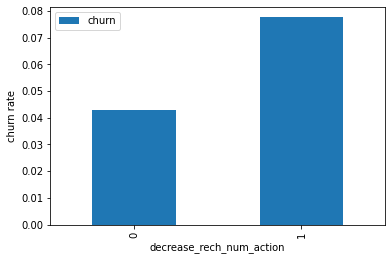

In [ ]:
# visualizing the decrease in number of recharge in action phase
df4.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can identify that those who have churned hugely decrease the number of recharges

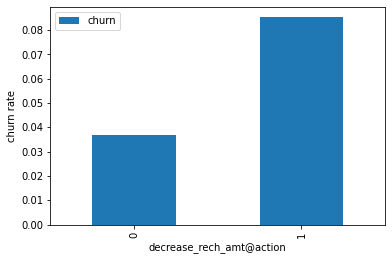

In [ ]:
# visualizing the decrese in recharge amount
df4.pivot_table(values='churn', index='decrease_rech_amt@action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can identify that those who have churned decrease their amount of recharge during action phase

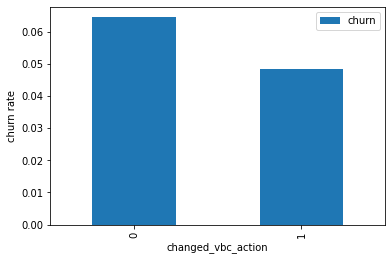

In [ ]:
df4.pivot_table(values='churn', index='changed_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can say that those who have churned changed their volume of rechage cost negatively

#### Bivariate Analysis

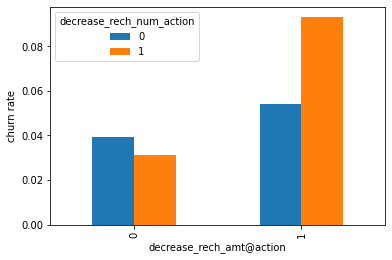

In [ ]:
# visualizing the decrease in recharge amount with respect to churn
df4.pivot_table(values='churn', index='decrease_rech_amt@action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can say that those who have churned significantly decrease their recharge amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


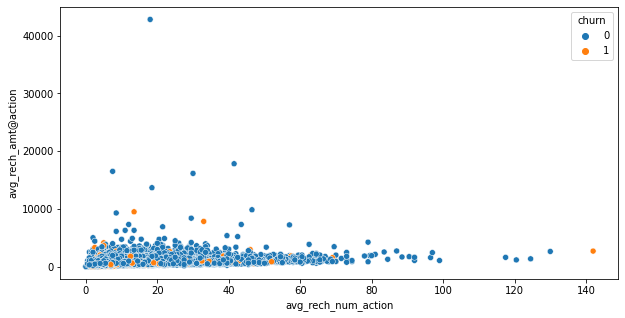

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt@action', hue='churn', data=df4)

We can say that churned users have lower number of recharges in lower amount

In [45]:
# dropping the columns not needed for further analysis
data = df4.drop(['total_mou@good','avg_mou@action','diff_mou','avg_rech_num_action','diff@rech_num','avg_rech_amt@action',
                 'diff_rech_amt','avg_arpu@action','diff_arpu','avg_vbc_3g@action','diff_vbc','avg_rech_amt2months'], axis=1)

#### Splitting data into train and test

In [46]:
# Importing library
from sklearn.model_selection import train_test_split

In [47]:
# defining feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [48]:
# defining target variable y
y = data['churn']

In [49]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [50]:
# handling data imbalance
## Import SMOTE
from imblearn.over_sampling import SMOTE

In [51]:
# instantiate SMOTE
sm = SMOTE(random_state=27)

In [52]:
# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

#### Feature Scaling

In [53]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler

In [54]:
# Instantiate Scaler
scaler = StandardScaler()

In [61]:
# Listing numeric columns
cols_scale = X_train.columns.to_list()
# Removing derived binary columns 
cols_scale.remove('changed_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt@action')
cols_scale.remove('changed_arpu_action')
cols_scale.remove('changed_vbc_action')

In [62]:
# Fitting data into scaler
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [63]:
X_train.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,changed_mou_action,decrease_rech_num_action,changed_arpu_action,changed_vbc_action,decrease_rech_amt@action
0,0.0,0.0,0.0,0.0,0.237173,-0.508401,0.497875,-0.131809,-0.058528,0.326416,-0.419563,-0.279375,0.278859,-0.076928,-0.204711,-0.241849,-0.062602,-0.283699,-0.270407,-0.248883,-0.070845,-0.141181,-0.119636,-0.252538,0.021217,-0.150995,-0.156161,-0.213214,-0.205324,-0.214682,-0.239505,-0.241308,-0.221911,-0.084316,-0.032671,-0.001964,0.482635,-0.364675,-0.160340,0.400620,-0.156211,0.010061,-0.127960,0.0,0.0,0.0,-0.283730,-0.117142,0.590159,-0.050708,-0.049907,-0.037845,-0.052116,0.425631,-0.299953,-0.350791,-0.021558,-0.020414,-0.390826,-0.202644,0.464667,-0.100483,-0.056485,-0.134363,-0.025466,-0.098614,0.274866,-0.279064,-0.165130,-0.025216,-0.103681,-0.121069,0.121222,-0.083439,0.142256,0.314980,0.115762,0.212923,0.107718,-0.138588,-0.135163,-0.110689,0.0,0.0,0.0,0.010031,0.217365,0.221319,-0.092295,-0.043322,0.265382,-0.387821,-0.148794,-0.171562,-0.023219,-0.121911,0.464750,-0.087871,-0.093212,-0.08424,-0.094586,0.377709,0.629854,0.056084,-0.498961,0.584019,-0.011482,-0.296586,0.130344,0.454427,-0.503384,-0.304384,-0.089616,-0.248444,-0.174463,0.395337,0.152637,0.197916,3.159439,-0.258610,3.385489,2.331541,2.080036,3.754863,-0.238275,-0.238995,-0.221886,1.161893,-0.141288,-0.121527,1.713523,0.098304,0.002235,1.000565,-0.104702,0,0,1,1,1
1,0.0,0.0,0.0,0.0,-0.593364,-0.466441,0.549899,-0.439484,-0.544471,-0.341281,-0.511692,-0.633089,-0.303224,-0.220925,-0.204711,-0.241849,-0.257647,-0.283699,-0.270407,0.232598,-0.095426,0.080417,0.048584,-0.270061,0.156434,-0.099468,0.073198,-0.064315,-0.235876,-0.214682,1.352767,0.166559,-0.232802,0.146391,-0.530349,-0.508399,-0.394801,-0.496662,-0.503569,-0.398509,-0.156211,-0.135504,0.395252,0.0,0.0,0.0,-0.722675,-0.709640,-0.524642,-0.050708,-0.049907,0.026576,-0.354655,-0.373968,0.236225,-0.350791,-0.021558,-0.020414,-0.637479,-0.800274,-0.379653,1.576994,1.460829,1.698219,-0.341721,0.435538,0.980917,-0.221883,0.449936,-0.144218,0.472464,1.130370,1.486461,-0.204705,-0.19

In [64]:
# Transforming test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,changed_mou_action,decrease_rech_num_action,changed_arpu_action,changed_vbc_action,decrease_rech_amt@action
3657,0.0,0.0,0.0,0.0,0.543438,0.778372,0.808043,2.618613,2.555463,3.110548,-0.624242,-0.673944,-0.473937,-0.220925,-0.204711,-0.241849,-0.257647,-0.283699,-0.270407,0.050848,1.711568,1.124949,-0.521013,-0.406608,-0.342324,-0.217416,-0.232320,-0.208271,0.285025,-0.032354,-0.004154,-0.323224,0.760689,0.460252,2.778574,2.029280,3.003106,-0.371629,-0.512897,-0.304739,-0.156211,-0.135504,-0.12796,0.0,0.0,0.0,1.661470,0.997410,1.837737,-0.050708,-0.049907,-0.039462,-0.154711,0.557295,0.175742,-0.350791,-0.021558,-0.020414,1.458002,1.312348,1.838678,0.181638,0.202398,-0.040665,-0.616773,-0.439139,-0.230603,-0.290287,-0.288240,-0.178629,-0.390730,-0.236387,-0.203273,-0.141339,-0.189098,0.018524,-0.016006,-0.243697,-0.081086,-0.138588,-0.135163,-0.110689,0.0,0.0,0.0,-0.115469,-0.299953,-0.067666,-0.417332,-0.294999,-0.224719,-0.387821,-0.148794,-0.171562,-0.187936,0.146573,-0.150626,-0.087871,0.019745,-0.017287,0.113832,0.377709,1.217642,0.340071,0.742797,0.976063,-0.173046,-0.189671,0.098807,-0.747387,-0.503384,-0.534121,-0.264490,-0.256923,-0.211187,-0.286050,-0.287152,-0.258367,-0.253077,-0.25861,-0.235359,0.380756,-0.277824,0.402445,-0.238275,-0.238995,-0.221886,-0.138222,-0.141288,-0.121527,0.098524,-0.276424,-0.295332,-0.273570,-0.104702,1,0,0,0,0
68131,0.0,0.0,0.0,0.0,0.290842,0.263638,0.167958,-0.405144,-0.418200,-0.414522,0.644187,0.908327,0.714765,0.336042,-0.204711,-0.241849,-0.047391,-0.283699,-0.270407,0.028202,-0.030140,-0.086417,-0.334986,0.239623,0.027052,-0.217416,-0.204586,-0.152666,-0.205324,-0.214682,-0.239505,-0.216365,0.126779,-0.043748,-0.413777,-0.401537,-0.386147,0.838185,0.929521,0.903975,-0.156211,-0.135504,-0.12796,0.0,0.0,0.0,0.306091,0.399091,0.331780,-0.050708,-0.049907,-0.039462,-0.137224,-0.144275,-0.192063,-0.350791,-0.021558,-0.020414,0.191286,0.433841,0.261191,0.160425,-0.009032,0.096717,-0.075034,-0.229666,0.247144,-0.307120,-0.088097,-0.130741,-0.019395,-0.174870,0.200475,-0.207563

#### Model Building

In [65]:
#Import PCA
from sklearn.decomposition import PCA

In [66]:
# Instantiate PCA
pca = PCA(random_state=42)

In [67]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [68]:
# Principal componants
pca.components_

array([[ 4.07109034e-20, -6.93889390e-18, -0.00000000e+00, ...,
        -2.14922609e-02,  1.28642344e-02, -2.13840531e-02],
       [-4.78663892e-20, -5.55111512e-17,  1.38777878e-16, ...,
        -6.48894966e-03, -1.39240335e-02, -6.68139554e-03],
       [ 1.17548662e-19, -9.71445147e-17, -0.00000000e+00, ...,
        -2.24992092e-02,  2.22636211e-02, -2.13422130e-02],
       ...,
       [-0.00000000e+00,  4.37802186e-01, -1.53149353e-01, ...,
        -4.85722573e-17,  6.93889390e-18, -1.19695920e-16],
       [-0.00000000e+00, -1.31380775e-01,  7.76761343e-03, ...,
        -0.00000000e+00,  6.76542156e-17, -7.37257477e-17],
       [ 9.99999911e-01, -5.57439398e-05, -3.96217136e-05, ...,
        -3.74049750e-18, -1.38100252e-17, -3.55415025e-18]])

In [69]:
# Cumulative variance of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.10441859 0.18591968 0.24197327 0.28626424 0.32744142 0.36394286
 0.39581739 0.42576695 0.45475233 0.4815173  0.50672921 0.52946444
 0.55106078 0.57179065 0.59200662 0.61143897 0.62831583 0.64424486
 0.65961963 0.67402474 0.68800369 0.70137607 0.7135718  0.7252402
 0.73534488 0.74482546 0.75407067 0.76277422 0.77109352 0.7790331
 0.78681847 0.79449948 0.80211137 0.80945601 0.81670303 0.82357015
 0.83033003 0.83688967 0.84315598 0.84926036 0.85513583 0.86066928
 0.86602829 0.87127384 0.87612163 0.88080056 0.88541707 0.88989129
 0.89412802 0.89826555 0.9021537  0.90586424 0.909506   0.91297758
 0.91637867 0.91972149 0.92302125 0.9261615  0.92915154 0.93212843
 0.93505955 0.93790163 0.94056512 0.94319046 0.94577586 0.94829288
 0.95071659 0.95309744 0.95541503 0.9576818  0.95989827 0.96207454
 0.96415765 0.96610719 0.96801006 0.96987868 0.97170909 0.97342899
 0.97506388 0.97665879 0.97822176 0.97977241 0.98129132 0.98277823
 0.98423267 0.98565085 0.98702531 0.98834272 0.98950669 0.990573

Text(0, 0.5, 'Cumulative Variance')

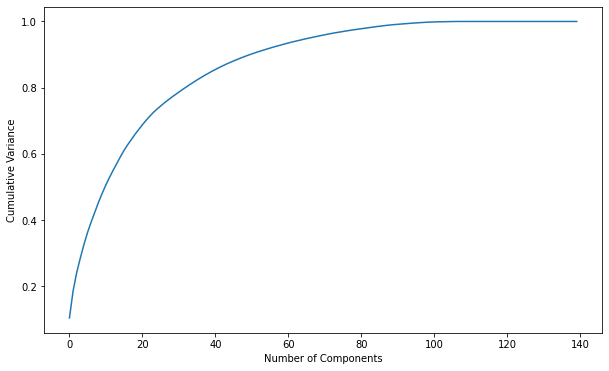

In [70]:
# Plot scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

As we can see 60 components explain around 90 perc variance in the data

In [71]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [72]:
# Instantiate PCA with 60 components
pca_60 = IncrementalPCA(n_components=60)

In [73]:
# Fit and transform the X_train
X_train_pca = pca_60.fit_transform(X_train)

In [74]:
# transform the test data
X_test_pca = pca_60.transform(X_test)

In [75]:
# Import scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [76]:
# Import metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Tuning Model Hyperparameters

In [77]:
# Import libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [78]:
# Create KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [79]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.371214,0.025252,0.007288,0.000281,0.01,{'C': 0.01},0.857211,0.861447,0.865460,0.859519,0.855444,0.859816,0.003479,6,0.862178,0.860218,0.860264,0.859085,0.860175,0.860384,0.000999
1,0.424199,0.026391,0.007089,0.000101,0.1,{'C': 0.1},0.859578,0.861904,0.867548,0.860213,0.857502,0.861349,0.003405,5,0.863500,0.861959,0.862286,0.860878,0.862205,0.862166,0.000836
2,0.443527,0.017812,0.007346,0.000411,1,{'C': 1},0.860052,0.861904,0.868012,0.859982,0.857731,0.861536,0.003498,4,0.863500,0.862423,0.862517,0.861110,0.862205,0.862351,0.000764
3,0.467417,0.015586,0.007739,0.000419,10,{'C': 10},0.860052,0.861904,0.868012,0.860213,0.857731,0.861582,0.003478,1,0.863558,0.862481,0.862517,0.861110,0.862205,0.862374,0.000782
4,0.461806,0.018437,0.008187,0.001276,100,{'C': 100},0.860052,0.861904,0.868012,0.860213,0.857731,0.861582,0.003478,1,0.863500,0.862481,0.862517,0.861110,0.862205,0.862363,0.000765
5,0.452326,0.011963,0.007425,0.000377,1000,{'C': 1000},0.860052,0.861904,0.868012,0.860213,0.857731,0.861582,0.003478,1,0.863500,0.862481,0.862517,0.861110,0.862205,0.862363,0.000765


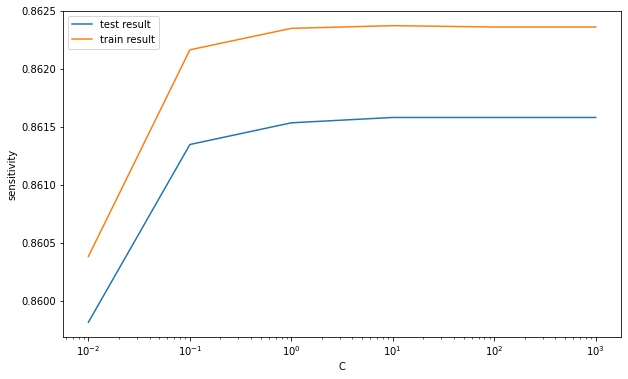

In [80]:
# plot of C versus train & validation scores

plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [81]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8615822835325593 at C = 10


In [82]:
# Instantiate model with best C
logistic_pca = LogisticRegression(C=best_C)

In [83]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [84]:
# Prediction on train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [85]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17484  4131]
 [ 2957 18658]]


In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8360397871848253
Sensitivity:- 0.8631968540365487
Specificity:- 0.808882720333102


In [88]:
# Prediction on test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [89]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4331 1108]
 [  83  251]]


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.793694786073099
Sensitivity:- 0.7514970059880239
Specificity:- 0.7962860820003678


Model performance is good.

#### Decision tree with PCA

In [94]:
# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [95]:
# Create parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [96]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.585421,0.017204,0.005798,0.000199,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.779320,0.783715,0.803377,0.735138,0.778857,0.776081,0.022351,5
1,1.573188,0.003042,0.005745,0.000158,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.779320,0.783715,0.803377,0.735138,0.778857,0.776081,0.022351,5
2,1.566651,0.005094,0.005882,0.000110,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.778626,0.776544,0.803377,0.732593,0.777932,0.773814,0.022894,7
3,1.561078,0.003753,0.005830,0.000100,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.778626,0.776544,0.803377,0.732593,0.777932,0.773814,0.022894,7
4,2.625169,0.018434,0.006042,0.000112,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.803609,0.850567,0.856812,0.818876,0.858663,0.837705,0.022302,1
5,2.673393,0.043226,0.006637,0.001252,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.803609,0.850567,0.856812,0.818876,0.858663,0.837705,0.022302,1
6,2.618773,0.276500,0.006260,0.000275,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.798751,0.831367,0.840157,0.829979,0.842933,0.828638,0.015745,3
7,2.483608,0.023161,0.006033,0.000139,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.798751,0.831136,0.840157,0.829979,0.842933,0.828591,0.015737,4


In [97]:
# Print the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8377052972472819
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [98]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [99]:
# Prediction on train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [100]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17983  3632]
 [ 2881 18734]]


In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8493407356002776
Sensitivity:- 0.8667129308350683
Specificity:- 0.831968540365487


In [104]:
# Prediction on test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [105]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4302 1137]
 [ 119  215]]


In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.782435475489347
Sensitivity:- 0.6437125748502994
Specificity:- 0.7909542195256482


#### Logistic regression without PCA

In [110]:
# Importi stats model
import statsmodels.api as sm

In [111]:
# Instantiate the model
## Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [112]:
# Fitting model
log_no_pca = log_no_pca.fit().summary()

In [113]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43230
Model:                            GLM   Df Residuals:                    43099
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15761.
Date:                Tue, 06 Sep 2022   Deviance:                       31522.
Time:                        06:57:01   Pearson chi2:                 5.30e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4381      0.038     11.413      0.000       0.363       0.513
circle_id                 8.297e-08    1.7e-08      4.889      0.000    4.97e-08    1.16e-07
loc_og_t2o_mou           -3.137e-08    2.9e-08     -1.083      0.279   -8.81e-08    2.54e-08
std_og_t2o_mou            7.523e-08   2.81e-08      2.680      0.007    2.02e-08     1.3e-07
loc_ic_t2o_mou           -1.493e-07   3.32e-08     -4.499      0.000   -2.14e-07   -8.42e-08
arpu_6                       0.3492      0.073      4.799      0.000       0.207       0.492
arpu_7                       0.4919      0.084      5.865      0.000       0.327       0.656
arpu_8                       1.5345      0.091     16.821      0.000       1.356       1.713
onnet_mou_6                  1.6810      2.100      0.800      0.423      -2.435       5.797
onnet_mou_7                 -1.1004      1.240     -0.888      0.375      -3.530       1.329
onnet_mou_8                  1.0500      1.024      1.025      0.305      -0.957       3.057
offnet_mou_6                 2.2474      2.144      1.048      0.295      -1.955       6.450
offnet_mou_7                -1.1244      1.278     -0.880      0.379      -3.629       1.381
offnet_mou_8                -0.2717      0.996     -0.273      0.785      -2.223       1.680
roam_ic_mou_6                0.0810      0.030      2.723      0.006       0.023       0.139
roam_ic_mou_7                0.1143      0.040      2.882      0.004       0.037       0.192
roam_ic_mou_8                0.0047      0.031      0.154      0.877      -0.055       0.065
roam_og_mou_6               -0.6402      0.602     -1.063      0.288      -1.820       0.540
roam_og_mou_7                0.3680      0.305      1.207      0.228      -0.230       0.966
roam_og_mou_8                0.0352      0.328      0.107      0.915      -0.608       0.679
loc_og_t2t_mou_6           922.3428    584.696      1.577      0.115    -223.641    2068.327
loc_og_t2t_mou_7          -928.8642    568.405     -1.634      0.102   -2042.918     185.189
loc_og_t2t_mou_8          5047.3593    551.403      9.154      0.000    3966.630    6128.089
loc_og_t2m_mou_6           976.9309    619.630      1.577      0.115    -237.521    2191.383
loc_og_t2m_mou_7         -1009.4829    617.654     -1.634      0.102   -2220.062     201.096
loc_og_t2m_mou_8          5274.6383    576.133      9.155      0.000    4145.439    6403.838
loc_og_t2f_mou_6           112.5738     71.196      1.581      0.114     -26.968     252.115
loc_og_t2f_mou_7          -104.6538     63.863     -1.639      0.101    -229.823      20.516
loc_og_t2f_mou_8           433.1554     47.316      9.155      0.000     340.418     525.893
loc_og_t2c_mou_6            -0.0230      0.017     -1.366      0.172      -0.056       0.010
loc_og_t2c_mou

Model is having higher p-value. Hence eliminating them using RFE

In [114]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [118]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [122]:
# Import RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
#rfe = RFE(logreg, 15)
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [123]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'total_ic_mou_8', 'total_rech_amt_8', 'monthly_2g_8', 'monthly_3g_8',
       'sep_vbc_3g', 'changed_arpu_action', 'changed_vbc_action'],
      dtype='object')


In [124]:
# Add constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43230
Model:                            GLM   Df Residuals:                    43214
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18758.
Date:                Tue, 06 Sep 2022   Deviance:                       37516.
Time:                        07:15:07   Pearson chi2:                 3.48e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2116      0.026      8.235      0.000       0.161       0.262
arpu_6                  0.7504      0.024     31.579      0.000       0.704       0.797
offnet_mou_8           -1.1996      0.058    -20.716      0.000      -1.313      -1.086
roam_og_mou_8           0.6056      0.025     24.530      0.000       0.557       0.654
std_og_t2m_mou_8        1.0071      0.051     19.659      0.000       0.907       1.108
total_og_mou_7          0.5509      0.025     21.785      0.000       0.501       0.600
total_og_mou_8         -0.8015      0.035    -23.108      0.000      -0.870      -0.734
loc_ic_mou_7            0.8498      0.035     23.976      0.000       0.780       0.919
loc_ic_mou_8           -1.1099      0.068    -16.250      0.000      -1.244      -0.976
total_ic_mou_8         -0.6299      0.052    -12.200      0.000      -0.731      -0.529
total_rech_amt_8       -0.7353      0.035    -21.072      0.000      -0.804      -0.667
monthly_2g_8           -0.8006      0.034    -23.585      0.000      -0.867      -0.734
monthly_3g_8           -0.7504      0.033    -22.649      0.000      -0.815      -0.685
sep_vbc_3g             -0.6881      0.056    -12.286      0.000      -0.798      -0.578
changed_arpu_action    -0.9607      0.034    -28.238      0.000      -1.027      -0.894
changed_vbc_action     -0.7852      0.056    -14.037      0.000      -0.895      -0.676
=======================================================================================
"""

In [125]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# Create a dataframe for VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_8,7.89
1,offnet_mou_8,6.91
8,total_ic_mou_8,5.72
3,std_og_t2m_mou_8,5.44
5,total_og_mou_8,3.95
9,total_rech_amt_8,3.09
6,loc_ic_mou_7,2.86
4,total_og_mou_7,2.02
0,arpu_6,1.75
2,roam_og_mou_8,1.29


In [127]:
# Remove loc_ic_mou_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('loc_ic_mou_8')
print(log_cols)

['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'changed_arpu_action', 'changed_vbc_action']


In [128]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43230
Model:                            GLM   Df Residuals:                    43215
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18884.
Date:                Tue, 06 Sep 2022   Deviance:                       37768.
Time:                        07:20:20   Pearson chi2:                 5.04e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2354      0.026      9.227      0.000       0.185       0.285
arpu_6                  0.7594      0.024     31.723      0.000       0.712       0.806
offnet_mou_8           -1.3845      0.057    -24.388      0.000      -1.496      -1.273
roam_og_mou_8           0.6534      0.025     26.379      0.000       0.605       0.702
std_og_t2m_mou_8        1.1893      0.050     23.826      0.000       1.091       1.287
total_og_mou_7          0.6058      0.025     23.892      0.000       0.556       0.656
total_og_mou_8         -0.8687      0.035    -24.872      0.000      -0.937      -0.800
loc_ic_mou_7            0.5625      0.028     20.209      0.000       0.508       0.617
total_ic_mou_8         -1.3259      0.040    -32.867      0.000      -1.405      -1.247
total_rech_amt_8       -0.7269      0.036    -20.384      0.000      -0.797      -0.657
monthly_2g_8           -0.7990      0.033    -23.891      0.000      -0.865      -0.733
monthly_3g_8           -0.7512      0.033    -22.782      0.000      -0.816      -0.687
sep_vbc_3g             -0.6943      0.056    -12.306      0.000      -0.805      -0.584
changed_arpu_action    -0.9723      0.034    -28.676      0.000      -1.039      -0.906
changed_vbc_action     -0.7790      0.056    -14.027      0.000      -0.888      -0.670
=======================================================================================
"""

In [129]:
# Create a dataframe for VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,6.74
3,std_og_t2m_mou_8,5.23
5,total_og_mou_8,3.92
8,total_rech_amt_8,3.08
7,total_ic_mou_8,2.43
6,loc_ic_mou_7,2.14
4,total_og_mou_7,2.00
0,arpu_6,1.74
2,roam_og_mou_8,1.29
12,changed_arpu_action,1.26


In [130]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

In [131]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43230
Model:                            GLM   Df Residuals:                    43216
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19230.
Date:                Tue, 06 Sep 2022   Deviance:                       38461.
Time:                        07:22:52   Pearson chi2:                 3.46e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2359      0.025      9.335      0.000       0.186       0.285
arpu_6                  0.7259      0.023     30.894      0.000       0.680       0.772
roam_og_mou_8           0.4256      0.023     18.589      0.000       0.381       0.470
std_og_t2m_mou_8        0.1018      0.020      5.075      0.000       0.062       0.141
total_og_mou_7          0.6581      0.025     25.891      0.000       0.608       0.708
total_og_mou_8         -0.9868      0.035    -28.009      0.000      -1.056      -0.918
loc_ic_mou_7            0.4922      0.028     17.761      0.000       0.438       0.547
total_ic_mou_8         -1.6036      0.040    -39.927      0.000      -1.682      -1.525
total_rech_amt_8       -0.8457      0.035    -24.339      0.000      -0.914      -0.778
monthly_2g_8           -0.7894      0.033    -23.785      0.000      -0.854      -0.724
monthly_3g_8           -0.7314      0.033    -22.433      0.000      -0.795      -0.667
sep_vbc_3g             -0.6791      0.055    -12.397      0.000      -0.787      -0.572
changed_arpu_action    -0.9311      0.033    -27.848      0.000      -0.997      -0.866
changed_vbc_action     -0.7478      0.055    -13.636      0.000      -0.855      -0.640
=======================================================================================
"""

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,3.71
7,total_rech_amt_8,2.95
6,total_ic_mou_8,2.37
5,loc_ic_mou_7,2.10
3,total_og_mou_7,1.99
2,std_og_t2m_mou_8,1.80
0,arpu_6,1.74
11,changed_arpu_action,1.26
1,roam_og_mou_8,1.20
9,monthly_3g_8,1.17


The above model is performing well with vifs. Hence proceeding further with this model

In [133]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    0.004702
1    0.055863
2    0.019030
3    0.714232
4    0.000021
dtype: float64

In [134]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,1,0.004702,0
1,0,0.055863,1
2,0,0.019030,2
3,0,0.714232,3
4,0,0.000021,4


In [135]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.004702,0,1,0,0,0,0,0,0,0,0,0
1,0,0.055863,1,1,0,0,0,0,0,0,0,0,0
2,0,0.019030,2,1,0,0,0,0,0,0,0,0,0
3,0,0.714232,3,1,1,1,1,1,1,1,1,0,0
4,0,0.000021,4,1,0,0,0,0,0,0,0,0,0


In [136]:
# Create a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
 

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.658108  0.974832     0.341383   
0.2  0.2          0.709924  0.955263     0.464585   
0.3  0.3          0.753944  0.926810     0.581078   
0.4  0.4          0.791441  0.893084     0.689799   
0.5  0.5          0.818552  0.848300     0.788804   
0.6  0.6          0.821490  0.776220     0.866759   
0.7  0.7          0.792991  0.666805     0.919176   
0.8  0.8          0.702591  0.449919     0.955263   
0.9  0.9          0.579921  0.176590     0.983252   


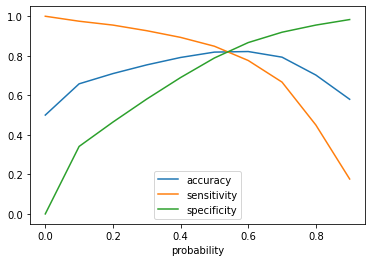

In [137]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

As we can identify that at 0.5 accuracy, sensitivity, specificity are optimal. But we want to acheive better sensitivity than accuracy and specificity. However from the above curve we should take 0.6 as the optimum probability cutoff, we are taking 0.4 for acheiving higher sensitivity, which is our main goal.

In [160]:
# Create a column with name "predicted" 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,1,0.004702,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.055863,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.019030,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.714232,3,1,1,1,1,1,1,1,1,0,0,1
4,0,0.000021,4,1,0,0,0,0,0,0,0,0,0,0


In [139]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[17050  4565]
 [ 3279 18336]]


In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8185519315290307
Sensitivity:- 0.8482997918112422
Specificity:- 0.7888040712468194


In [142]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

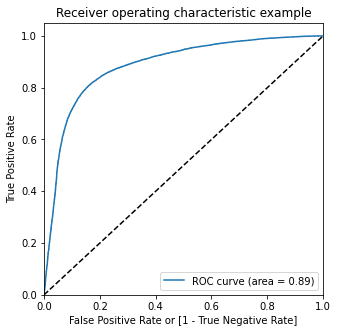

In [143]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

In [144]:
# create copy of the test set
X_test_log = X_test.copy()

In [145]:
# Taking only those columns, which were selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [147]:
# Adding constant on test set
X_test_sm = sm.add_constant(X_test_log)

In [148]:
# Prediction on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [149]:
y_test_pred.head()

3657     0.347789
68131    0.054569
133      0.002823
9066     0.617308
22344    0.296323
dtype: float64

In [150]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3657,0.347789
68131,0.054569
133,0.002823
9066,0.617308
22344,0.296323


In [151]:
# Convert y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
3657,0
68131,0
133,0
9066,0
22344,0


In [152]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [153]:
# resetting index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [154]:
# Append y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [156]:
# check the head count
y_test_pred_final.head()

,churn,CustID,0
0,0,3657,0.347789
1,0,68131,0.054569
2,0,133,0.002823
3,0,9066,0.617308
4,0,22344,0.296323


In [157]:
# Renaming the column
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [159]:
y_test_pred_final.head()

,churn,CustID,churn_prob
0,0,3657,0.347789
1,0,68131,0.054569
2,0,133,0.002823
3,0,9066,0.617308
4,0,22344,0.296323


In [161]:
# mapping the test set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.4 else 0)

In [162]:
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,3657,0.347789,0
1,0,68131,0.054569,0
2,0,133,0.002823,0
3,0,9066,0.617308,1
4,0,22344,0.296323,0


In [163]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[3698 1741]
 [  60  274]]


In [164]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.6880304867486575
Sensitivity: 0.8203592814371258
Specificity: 0.6799043941901085


Final Mode with no PCA

Here it is palpable that the logistic model with no PCA has good sensitivity and accuracy than models with PCA. 
Hence we can proceed futher with simple model such as logistic regression without PCA as it expliains the important predictor variables and the significance variable as well. LR Model helps us to identify the variables which should be considered for identifying users who are likely to churn.

#### Identifying important churn indicators and business recommendation

Important churn indicators are:

arpu_6	
roam_og_mou_8	
std_og_t2m_mou_8	
total_og_mou_7	
total_og_mou_8	
loc_ic_mou_7
total_ic_mou_8	
total_rech_amt_8
monthly_2g_8	
monthly_3g_8
sep_vbc_3g  
changed_arpu_action    
changed_vbc_action	

Actionable Recomendations

- Target those customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase 
- Target those customers, whose outgoing others charge in July and incoming others on August are less
In addition, the customers having value based cost in the action phase increased are more likely to churn than other customers.
- Customers whose monthly 3G recharge in August is more, are likely to be churned
- Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn
- Cutomers having decrease monthly 2g usage for August are probable to churn
- Customers having decrease incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
roam_og_mou_8 variables have positive coefficient(0.4256) which signifies that for the customers having roam_outgoing minutes of usage increasing are likely to churn